In [4]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a third convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [6]:
# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 64, activation = 'relu'))
classifier.add(Dropout(rate = 0.95))
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dropout(rate = 0.93))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [7]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 12, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)             

In [8]:
# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('image_data/training',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('image_data/validation',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

history=classifier.fit_generator(training_set,
                         steps_per_epoch = 20,
                         epochs = 100,
                         validation_data = test_set,
                         validation_steps = 2)

Found 2000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
20/20 [==============================] - 465s 23s/step - loss: 0.7605 - accuracy: 0.5031 - val_loss: 0.6905 - val_accuracy: 0.5469
Epoch 2/100
20/20 [==============================] - 456s 23s/step - loss: 0.6930 - accuracy: 0.5256 - val_loss: 0.6919 - val_accuracy: 0.5312
Epoch 3/100
20/20 [==============================] - 464s 23s/step - loss: 0.6922 - accuracy: 0.5172 - val_loss: 0.6919 - val_accuracy: 0.5156
Epoch 4/100
20/20 [==============================] - 458s 23s/step - loss: 0.6995 - accuracy: 0.4920 - val_loss: 0.6921 - val_accuracy: 0.5469
Epoch 5/100
20/20 [==============================] - 465s 23s/step - loss: 0.6930 - accuracy: 0.5125 - val_loss: 0.6926 - val_accuracy: 0.5312
Epoch 6/100
20/20 [==============================] - 459s 23s/step - loss: 0.6930 - accuracy: 0.4984 - val_loss: 0.6923 - val_

In [9]:
#Summarising the Results
import numpy as np

a=list(history.history['accuracy'])
b=list(history.history['val_accuracy'])

max_train=100*np.round(max(a),4)
max_validation=100*np.round(max(b),4)

#Finding max of Training accuracy
print("Maximum Training Accuracy is",max_train)

#Finding max  validation accuracy
print("Maximum Validtion Accuracy is",max_validation)

Maximum Training Accuracy is 90.62
Maximum Validtion Accuracy is 98.44000000000001


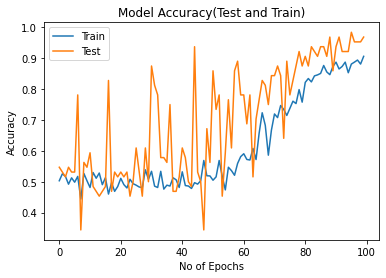

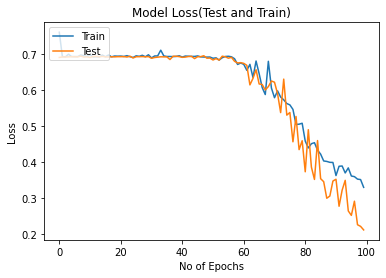

In [10]:
#Plotting Test vs Train Accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy(Test and Train)')
plt.ylabel('Accuracy')
plt.xlabel('No of Epochs')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#Plotting Test vs Train Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss(Test and Train)')
plt.ylabel('Loss')
plt.xlabel('No of Epochs')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()